In [0]:
! pip install keras-tuner

In [0]:
import tensorflow as tf
from tensorflow  import keras 
import numpy as np

In [4]:
print(tf.__version__)

2.2.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [6]:
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images= train_images/255.0
test_images= test_images/255.0

In [8]:
train_images.shape# (nb_samples, 28, 28)

(60000, 28, 28)

In [9]:
train_images[0].shape

(28, 28)

The Convolution2D layers in Keras however, are designed to work with 3 dimensions per example. They have 4-dimensional inputs and outputs.

When using a convolutional layer as the first layer to our model, we need to reshape our data to (n_images, x_shape, y_shape, channels). All you really need to know is that you should set channels to 1 for grayscale images and set channels to 3 when you have a set of RGB-images as input.

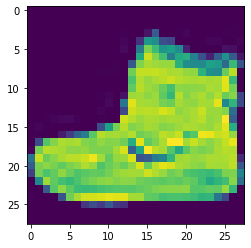

9

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape([28, 28]))
plt.show()
train_labels[0]

In [0]:
#reshaping 
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)

In [0]:
#https://keras-team.github.io/keras-tuner/
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [0]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [0]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [15]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4096 - accuracy: 0.8525 - val_loss: 0.3084 - val_accuracy: 0.8830
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2629 - accuracy: 0.9035 - val_loss: 0.2713 - val_accuracy: 0.8990
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2052 - accuracy: 0.9228 - val_loss: 0.2472 - val_accuracy: 0.9100


Epoch 1/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3915 - accuracy: 0.8594 - val_loss: 0.2810 - val_accuracy: 0.8943
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2428 - accuracy: 0.9111 - val_loss: 0.2381 - val_accuracy: 0.9097
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1821 - accuracy: 0.9333 - val_loss: 0.2574 - val_accuracy: 0.9103


Epoch 1/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5834 - accuracy: 0.7973 - val_loss: 0.4528 - val_accuracy: 0.8405
Epoch 2/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4237 - accuracy: 0.8444 - val_loss: 0.4234 - val_accuracy: 0.8468
Epoch 3/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3961 - accuracy: 0.8545 - val_loss: 0.4061 - val_accuracy: 0.8528


Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3867 - accuracy: 0.8625 - val_loss: 0.3032 - val_accuracy: 0.8857
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2469 - accuracy: 0.9085 - val_loss: 0.2562 - val_accuracy: 0.9090
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1866 - accuracy: 0.9311 - val_loss: 0.2612 - val_accuracy: 0.9100


Epoch 1/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3817 - accuracy: 0.8621 - val_loss: 0.3124 - val_accuracy: 0.8838
Epoch 2/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2351 - accuracy: 0.9137 - val_loss: 0.2574 - val_accuracy: 0.9050
Epoch 3/3
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1678 - accuracy: 0.9376 - val_loss: 0.2460 - val_accuracy: 0.9120


INFO:tensorflow:Oracle triggered exit


In [0]:
model=tuner_search.get_best_models(num_models=1)[0]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 112)               4128880   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1130      
Total params: 4,186,330
Trainable params: 4,186,330
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1173 - accuracy: 0.9561 - val_loss: 0.2924 - val_accuracy: 0.9072
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0770 - accuracy: 0.9712 - val_loss: 0.2908 - val_accuracy: 0.9143
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0506 - accuracy: 0.9809 - val_loss: 0.3369 - val_accuracy: 0.9128
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0354 - accuracy: 0.9872 - val_loss: 0.4674 - val_accuracy: 0.9177
Epoch 8/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0298 - accuracy: 0.9903 - val_loss: 0.5060 - val_accuracy: 0.9095
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0219 - accuracy: 0.9925 - val_loss: 0.5566 - val_accuracy: 0.9130
Epoch 10/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0203 - accuracy: 0.9929 - val_loss: 0.5202 - val_accuracy